In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt                                                                                                                                                                                                                                                      
import seaborn as sns

In [3]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
import pandas as pd

In [5]:
df = pd.read_csv(r'D:\PYTHON_NOTES\CSV\diabetes.csv')

In [6]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# outlier()

In [7]:
q1=df['Insulin'].quantile(0.25)
q3=df['Insulin'].quantile(0.75)
iqr= q3-q1
uppertail=q3+1.5*iqr
lowertail=q1-1.5*iqr

In [8]:
df.loc[(df.Insulin>uppertail)|(df.Insulin<lowertail)]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
54             7      150             66             42      342  34.7   
111            8      155             62             26      495  34.0   
139            5      105             72             29      325  36.9   
153            1      153             82             42      485  40.6   
186            8      181             68             36      495  30.1   
220            0      177             60             29      478  34.6   
228            4      197             70             39      744  36.7   
231            6      134             80             37      370  46.2   
247            0      165             90             33      680  52.3   
248            9      124             70             33      402  35.4   
258            1      193             50             16      375  25.9   
286            5      155             84             44      545  38.7   
296            2      146             70             38      360  28.0   
360            5      189             64             33      325  31.2   
370            3      173             82             48      465  38.4   
375           12      140             82             43      325  39.2   
392            1      131             64             14      415  23.7   
409            1      172             68             49      579  42.4   
415            3      173             84             33      474  35.7   
480            3      158             70             30      328  35.5   
486            1      139             62             41      480  40.7   
519            6      129             90              7      326  19.6   
574            1      143             86             30      330  30.1   
584            8      124             76             24      600  28.7   
612            7      168             88             42      321  38.2   
645            2      157             74             35      440  39.4   
655            2      155             52             27      540  38.7   
695            7      142             90             24      480  30.4   
707            2      127             46             21      335  34.4   
710            3      158             64             13      387  31.2   
715            7      187             50             33      392  33.9   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
8                       0.158   53        1  
13                      0.398   59        1  
54                      0.718   42        0  
111                     0.543   46        1  
139                     0.159   28        0  
153                     0.687   23        0  
186                     0.615   60        1  
220                     1.072   21        1  
228                     2.329   31        0  
231                     0.238   46        1  
247                     0.427   23        0  
248                     0.282   34        0  
258                     0.655   24        0  
286                     0.619   34        0  
296                     0.337   29        1  
360                     0.583   29        1  
370                     2.137   25        1  
375                     0.528   58        1  
392                     0.389   21        0  
409                     0.702   28        1  
415                     0.258   22        1  
480                     0.344   35        1  
486                     0.536   21        0  
519                     0.582   60        0  
574                     0.892   23        0  
584                     0.687   52        1  
612                     0.787   40        1  
645                     0.134   30        0  
655                     0.240   25        1  
695                     0.128   43

In [9]:
val=df['Insulin'].loc[~((df.Insulin>uppertail)|(df.Insulin<lowertail))].mean()

In [10]:
val

62.328337874659404

In [11]:
df['Insulin'].loc[(df.Insulin>uppertail)|(df.Insulin<lowertail)]=val

In [12]:
df.loc[(df.Insulin>uppertail)|(df.Insulin<lowertail)]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [13]:
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
91             4      123             80             15  176.000000  32.0   
190            3      111             62              0    0.000000  22.6   
22             7      196             90              0    0.000000  39.8   
300            0      167              0              0    0.000000  32.3   
403            9       72             78             25    0.000000  31.6   
375           12      140             82             43   62.328338  39.2   
421            2       94             68             18   76.000000  26.0   
146            9       57             80             37    0.000000  32.8   
750            4      136             70              0    0.000000  31.2   
457            5       86             68             28   71.000000  30.2   

     DiabetesPedigreeFunction  Age  Outcome  
91                      0.443   34        0  
190                     0.142   21        0  
22                      0.451   41        1  
300                     0.839   30        1  
403                     0.280   38        0  
375                     0.528   58        1  
421                     0.561   21        0  
146                     0.096   41        0  
750                     1.182   22        1  
457                     0.364   24        0

<AxesSubplot:xlabel='Insulin'>

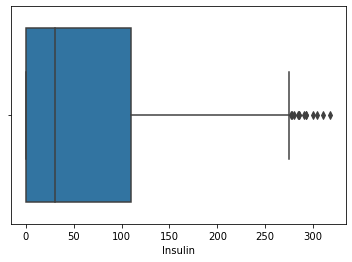

In [14]:
sns.boxplot(df.Insulin)

# model training

In [15]:
x=df.drop('Outcome',axis=1)
y=df.Outcome
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)


In [16]:
knnmodel=KNeighborsClassifier()
knnmodel.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
y_pred_train =knnmodel.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[361  39]
 [ 75 139]]
0.8143322475570033
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       400
           1       0.78      0.65      0.71       214

    accuracy                           0.81       614
   macro avg       0.80      0.78      0.79       614
weighted avg       0.81      0.81      0.81       614



In [18]:
hype = {'n_neighbors':np.arange(3,20),
       'p':[1,2]}
model = KNeighborsClassifier()
resdv=RandomizedSearchCV(model,hype,cv=5)
resdv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'p': [1, 2]})

In [19]:
resdv.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [20]:
mod = KNeighborsClassifier(n_neighbors=15, p=1)
mod.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15, p=1)

In [21]:
y_pred = mod.predict(x_train)
classification_report_ = classification_report(y_train,y_pred)

In [22]:
print(classification_report_)

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       400
           1       0.75      0.57      0.65       214

    accuracy                           0.78       614
   macro avg       0.77      0.73      0.75       614
weighted avg       0.78      0.78      0.78       614



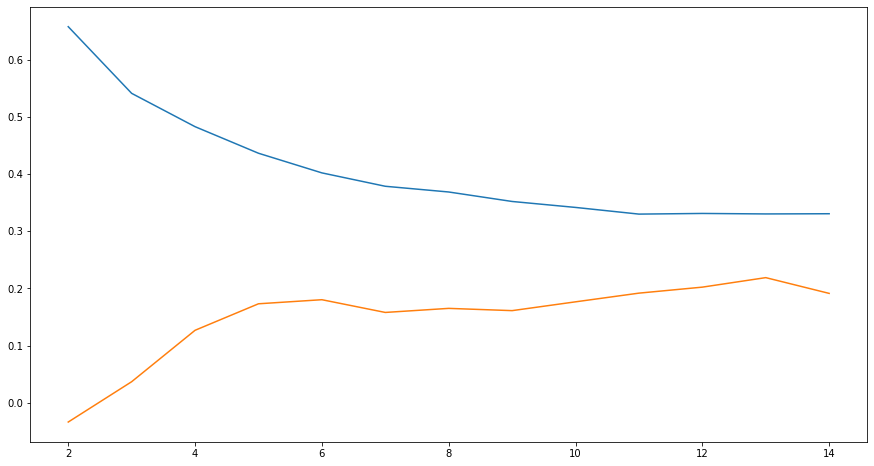

In [28]:
train =[]
test  =[]
k_val =range(2,15)
for i in k_val:
    knn_reg=KNeighborsRegressor(n_neighbors=i,p=1)
    knn_reg.fit(x_train,y_train)
    train_score=knn_reg.score(x_train,y_train)
    train.append(train_score)
    
    test_score= knn_reg.score(x_test,y_test)
    test.append(test_score)
plt.figure(figsize=(15,8))

plt.plot(k_val,train)
plt.plot(k_val,test)
plt.show()

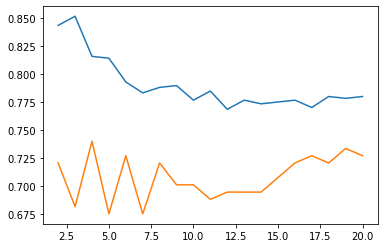

In [31]:
train =[]
test =[]
k_range =range(2,21)
for i in k_range:
    model = KNeighborsClassifier(n_neighbors=i,p=2)
    model.fit(x_train,y_train)
    
    train_score = model.score(x_train,y_train)
    train.append(train_score)
    
    train_score = model.score(x_test,y_test)
    test.append(train_score)

plt.plot(k_range,train)
plt.plot(k_range,test)

In [33]:
import matplotlib.pyplot as plt

# GRid Search 

In [23]:
import numpy as np
knn_clf= KNeighborsClassifier()
para ={'n_neighbors':np.arange(3,20),
      'p':[1,2]}
grdscv= GridSearchCV(knn_clf,para,cv=4)
grdscv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'p': [1, 2]})

In [24]:
grdscv.best_estimator_

KNeighborsClassifier(n_neighbors=16)

In [21]:
grdscv.best_params_

{'n_neighbors': 16, 'p': 2}

In [22]:
knn_clf =KNeighborsClassifier(n_neighbors=14)

In [23]:
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [24]:
y_pred_train =knn_clf.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[363  37]
 [102 112]]
0.7736156351791531
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       400
           1       0.75      0.52      0.62       214

    accuracy                           0.77       614
   macro avg       0.77      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614



In [25]:
x_df =df.drop("Outcome",axis=1)
y =df['Outcome']

# feature scalling 

In [46]:
normal=MinMaxScaler()
arr =normal.fit_transform(x_df)

In [47]:
x=arr.copy()

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20,stratify=y)


In [49]:
knn_clf =KNeighborsClassifier()
para ={"n_neighbors":np.arange(3,20),"p":[1,2]}
random_srch =RandomizedSearchCV(knn_clf,para,cv=4)
random_srch.fit(x_train,y_train)
random_srch.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [50]:
knn_clf =KNeighborsClassifier(n_neighbors=19)
knn_clf.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=19)

In [51]:
y_pred_train =knn_clf.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[371  29]
 [103 111]]
0.7850162866449512
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       400
           1       0.79      0.52      0.63       214

    accuracy                           0.79       614
   macro avg       0.79      0.72      0.74       614
weighted avg       0.79      0.79      0.77       614



In [52]:
normal=StandardScaler()
arr =normal.fit_transform(x_df)
x=arr.copy()

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20,stratify=y)


In [54]:
knn_clf =KNeighborsClassifier()
para ={"n_neighbors":np.arange(3,20),"p":[1,2]}
random_srch =RandomizedSearchCV(knn_clf,para,cv=4)
random_srch.fit(x_train,y_train)
random_srch.best_estimator_

KNeighborsClassifier(n_neighbors=17, p=1)

In [ ]:
model = KNN()
para ={'n_neighbors':np.arange(3,20),'p':[1,2]}


In [55]:
knn_clf =KNeighborsClassifier(n_neighbors=19)
knn_clf.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=19)

In [56]:
y_pred_train =knn_clf.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[369  31]
 [100 114]]
0.7866449511400652
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       400
           1       0.79      0.53      0.64       214

    accuracy                           0.79       614
   macro avg       0.79      0.73      0.74       614
weighted avg       0.79      0.79      0.77       614



# KNN_regrssion

In [58]:
from sklearn.datasets import load_boston

In [63]:
x=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)

In [64]:
x

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [65]:
y=pd.Series(load_boston().target)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [69]:
knn_reg =KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [73]:
y_pred_train =knn_reg.predict(x_train)
cnf_metric =mean_absolute_error(y_train,y_pred_train)
print(cnf_metric)

accuracy=mean_squared_error(y_train,y_pred_train)
print(accuracy)
clf_report =r2_score(y_train,y_pred_train)
print(clf_report)

3.6084158415841583
27.458910891089108
0.6839203981935851


In [75]:
knn_reg =LinearRegression()
knn_reg.fit(x_train,y_train)

LinearRegression()

In [77]:
knn_reg.score(x_train,y_train)

0.7508856358979673

In [76]:
y_pred_train =knn_reg.predict(x_train)
cnf_metric =mean_absolute_error(y_train,y_pred_train)
print(cnf_metric)
accuracy=mean_squared_error(y_train,y_pred_train)
print(accuracy)
clf_report =r2_score(y_train,y_pred_train)
print(clf_report)

3.3147716267832266
21.641412753226312
0.7508856358979673


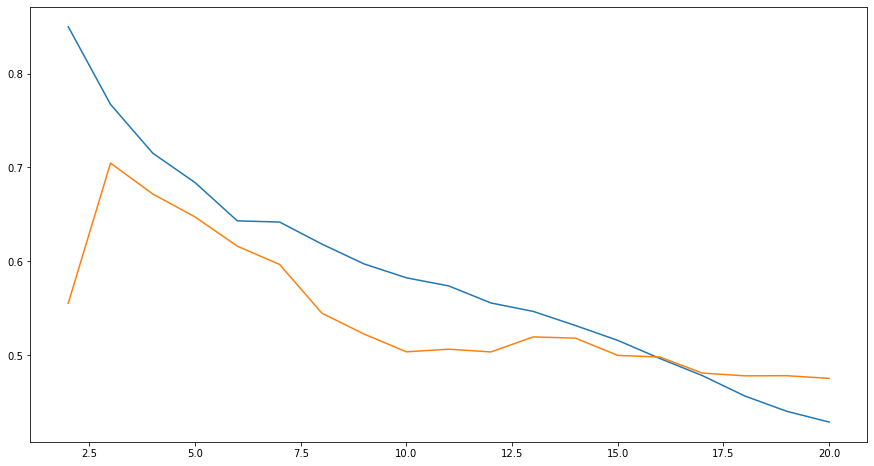

In [82]:
train =[]
test  =[]
k_val =range(2,21)
for i in k_val:
    knn_reg=KNeighborsRegressor(n_neighbors=i,p=2)
    knn_reg.fit(x_train,y_train)
    train_score=knn_reg.score(x_train,y_train)
    train.append(train_score)
    
    test_score= knn_reg.score(x_test,y_test)
    test.append(test_score)
    
plt.figure(figsize=(15,8))

plt.plot(k_val,train)
plt.plot(k_val,test)
plt.show()

# on variois neibhours


In [ ]:
train=[]
test =[]
k_range= range(3,21)
for i in k_range:
    model = knn(n_neighbors=i)
    model.fit(x_train,y_train)
    train_score = model.fit(x_train,y_train)
    train.append(train_score)
    
    
    test_score =modelt.score(x_test,y_test)
    test.append(test)

plt.plot(k_val,train)
plt.plot(k_val,test)
plt.show()

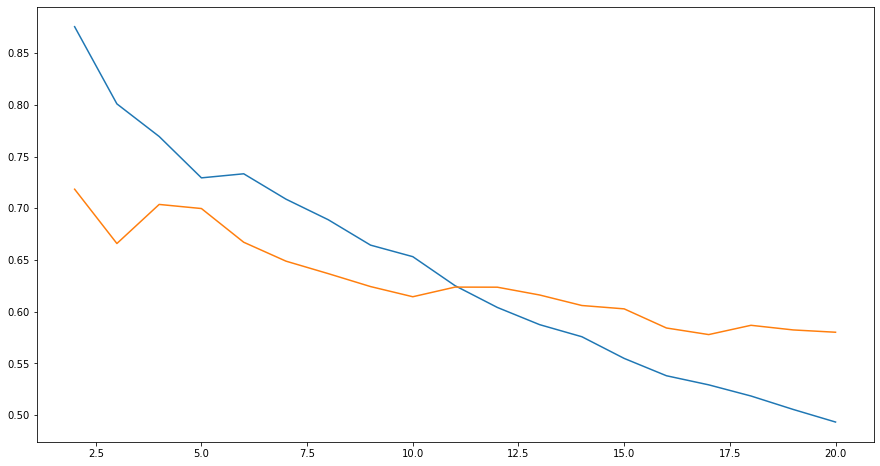

In [83]:
train =[]
test  =[]
k_val =range(2,21)
for i in k_val:
    knn_reg=KNeighborsRegressor(n_neighbors=i,p=1)
    knn_reg.fit(x_train,y_train)
    train_score=knn_reg.score(x_train,y_train)
    train.append(train_score)
    
    test_score= knn_reg.score(x_test,y_test)
    test.append(test_score)
    
plt.figure(figsize=(15,8))

plt.plot(k_val,train)
plt.plot(k_val,test)
plt.show()

# writing api

In [106]:
knn_reg.predict(x.iloc[1:2,])

array([22.425])

In [111]:
x.iloc[1:0,].T

Empty DataFrame
Columns: []
Index: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]

In [108]:
test_array=np.zeros(len(x.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [110]:
CRIM=0.02731
ZN=0.00000
INDUS=7.07000
CHAS=0.00000
NOX=0.46900
RM=6.42100
AGE=78.90000
DIS=4.96710
RAD=2.00000
TAX=242.00000
PTRATIO=17.80000
B=396.90000
LSTAT=9.14000

In [112]:
test_array[0]=CRIM
test_array[1]=ZN
test_array[2]=INDUS
test_array[3]=CHAS
test_array[4]=NOX
test_array[5]=RM
test_array[6]=AGE
test_array[7]=DIS
test_array[8]=RAD
test_array[9]=TAX
test_array[10]=PTRATIO
test_array[11]=B
test_array[12]=LSTAT

In [113]:
knn_reg.predict([test_array])

array([22.425])

In [117]:
df = pd.read_csv(r"D:/PYTHON_NOTES/CSV/titanic.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [118]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.386083    2.308642   29.699118    0.523008   
std     257.353842    0.487123    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

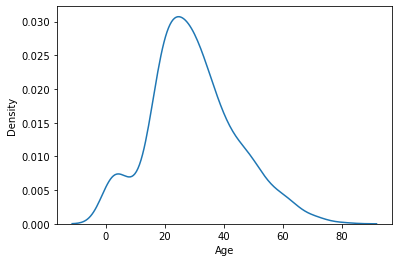

In [122]:
import seaborn as sns
sns.kdeplot(df.Age)
plt.show()

In [123]:
df.Age=df.Age.fillna(df.Age.mean())

<AxesSubplot:xlabel='Age', ylabel='Density'>

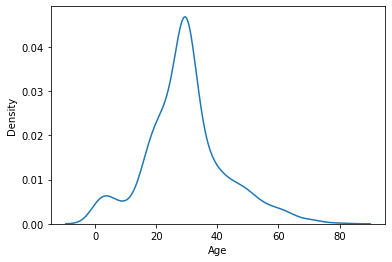

In [124]:
sns.kdeplot(df.Age)

In [125]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Gender        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  
0        1      0         A/5 21171   7.2500   NaN        S  
1        1      0          PC 17599  71.2833   C85        C  
2        0      0  STON/O2. 3101282   7.9250   NaN        S  
3        1      0            113803  53.1000  C123        S  
4        0      0            373450   8.0500   NaN        S  
..     ...    ...               ...      ...   ...      ...  
886      0      0            211536  13.0000   NaN        S  
887      0      0            112053  30.0000   B42        S  
888      1      2        W./C. 6607  23.4500   NaN        S  
889      0      0            111369  30.0000  C148        C  
890      0      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [17]:
import numpy as np
import pandas as pd
df = pd.DataFrame({"A":[40,20,30,42,np.nan,200,10,50,60],
                  "B":[10,12,13,14,15,16,14,15,13],
                  "C":[1,2,3,4,5,6,4,2,3]})
df

A   B  C
0   40.0  10  1
1   20.0  12  2
2   30.0  13  3
3   42.0  14  4
4    NaN  15  5
5  200.0  16  6
6   10.0  14  4
7   50.0  15  2
8   60.0  13  3

In [20]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
array =knn_imputer.fit_transform(df)
array

array([[ 40.,  10.,   1.],
       [ 20.,  12.,   2.],
       [ 30.,  13.,   3.],
       [ 42.,  14.,   4.],
       [ 84.,  15.,   5.],
       [200.,  16.,   6.],
       [ 10.,  14.,   4.],
       [ 50.,  15.,   2.],
       [ 60.,  13.,   3.]])

In [21]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer
knn_impute = KNNImputer(n_neighbors=3)
knn_impute.fit_transform(df)

array([[ 40.,  10.,   1.],
       [ 20.,  12.,   2.],
       [ 30.,  13.,   3.],
       [ 42.,  14.,   4.],
       [ 84.,  15.,   5.],
       [200.,  16.,   6.],
       [ 10.,  14.,   4.],
       [ 50.,  15.,   2.],
       [ 60.,  13.,   3.]])

In [12]:
df=pd.DataFrame(array,columns=df.columns)

In [133]:
df.replace(200,np.nan,inplace=True)

In [134]:
df

A     B    C
0  40.0  10.0  1.0
1  20.0  12.0  2.0
2  30.0  13.0  3.0
3  42.0  14.0  4.0
4  84.0  15.0  5.0
5   NaN  16.0  6.0
6  10.0  14.0  4.0
7  50.0  15.0  2.0
8  60.0  13.0  3.0

In [136]:
from sklearn.impute import KNNImputer
imputer =KNNImputer()
imputer.fit_transform(df)

array([[40. , 10. ,  1. ],
       [20. , 12. ,  2. ],
       [30. , 13. ,  3. ],
       [42. , 14. ,  4. ],
       [84. , 15. ,  5. ],
       [49.2, 16. ,  6. ],
       [10. , 14. ,  4. ],
       [50. , 15. ,  2. ],
       [60. , 13. ,  3. ]])

In [142]:
df= pd.DataFrame(array,columns=df.columns)
df

A     B    C
0  40.0  10.0  1.0
1  20.0  12.0  2.0
2  30.0  13.0  3.0
3  42.0  14.0  4.0
4  84.0  15.0  5.0
5   NaN  16.0  6.0
6  10.0  14.0  4.0
7  50.0  15.0  2.0
8  60.0  13.0  3.0

In [141]:
imputer.fit_transform(df)

array([[40. , 10. ,  1. ],
       [20. , 12. ,  2. ],
       [30. , 13. ,  3. ],
       [42. , 14. ,  4. ],
       [84. , 15. ,  5. ],
       [49.2, 16. ,  6. ],
       [10. , 14. ,  4. ],
       [50. , 15. ,  2. ],
       [60. , 13. ,  3. ]])

In [149]:
df1 = pd.DataFrame({"A":[40,5,43,np.nan,41,48,52],
                  "B":[10,18,13,16,20,np.nan,15],
                   "C":[1,5,1,2,8,3,9]})
df1

A     B  C
0  40.0  10.0  1
1   5.0  18.0  5
2  43.0  13.0  1
3   NaN  16.0  2
4  41.0  20.0  8
5  48.0   NaN  3
6  52.0  15.0  9

In [154]:
df1.A

0    40.0
1     5.0
2    43.0
3     NaN
4    41.0
5    48.0
6    52.0
Name: A, dtype: float64

In [156]:
df1 = pd.DataFrame({"A":[40,5,43,np.nan,41,48,52],
                  "B":[10,18,13,16,20,np.nan,15],
                   "C":[1,5,1,2,8,3,9]})
df1

A     B  C
0  40.0  10.0  1
1   5.0  18.0  5
2  43.0  13.0  1
3   NaN  16.0  2
4  41.0  20.0  8
5  48.0   NaN  3
6  52.0  15.0  9

In [158]:
imputer =KNNImputer(n_neighbors=3)
imputer.fit_transform(df1)

array([[40.        , 10.        ,  1.        ],
       [ 5.        , 18.        ,  5.        ],
       [43.        , 13.        ,  1.        ],
       [32.        , 16.        ,  2.        ],
       [41.        , 20.        ,  8.        ],
       [48.        , 14.66666667,  3.        ],
       [52.        , 15.        ,  9.        ]])

In [159]:
Random Oversampling

SyntaxError: invalid syntax (<ipython-input-159-712a5a25233a>, line 1)

In [162]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [22]:
df = pd.read_csv(r"D:/PYTHON_NOTES/CSV/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


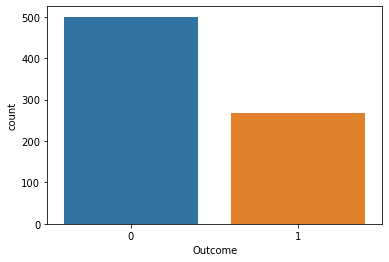

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.Outcome)
plt.show()

In [28]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [29]:
df.Outcome.value_counts()[0]/df.shape[0]*100

65.10416666666666

In [30]:
df.Outcome.value_counts()[1]/df.shape[0]*100

34.89583333333333

In [43]:
x= df.drop('Outcome',axis=1)
y= df.Outcome
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler

In [46]:
sample = RandomOverSampler(sampling_strategy=0.7)
x_sampled,y_sampled = sample.fit_resample(x,y)

In [47]:
rand_sample =RandomOverSampler(sampling_strategy=0.7)
x_sampled,y_sampled=rand_sample.fit_resample(x,y)

In [48]:
y_sampled.value_counts()

0    500
1    350
Name: Outcome, dtype: int64

# smote

In [205]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [208]:
smt =SMOTE(sampling_strategy=0.65,k_neighbors=5,random_state=45)
x_sampled,y_sampled=smt.fit_resample(x,y)
y_sampled.value_counts()

0    500
1    325
Name: Outcome, dtype: int64

In [209]:
from imblearn.under_sampling import RandomUnderSampler

In [213]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [214]:
from imblearn.under_sampling import RandomUnderSampler
random =RandomUnderSampler(sampling_strategy=0.8)
x_sampled,y_sampled=random.fit_resample(x,y)

0      0
1      0
2      0
3      0
4      0
      ..
598    1
599    1
600    1
601    1
602    1
Name: Outcome, Length: 603, dtype: int64

# Attribute Selection Measures tech

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier,RandomForestClassifier,RandomForestRegressor

In [324]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [344]:
df= pd.read_csv(r"D:/PYTHON_NOTES/CSV/weatherr.csv")

In [345]:
df.head()

outlook temperature humidity  windy play  Unnamed: 5    Outlook  \
0  overcast         hot     high  FALSE  yes         NaN  4Y and 0N   
1  overcast        cool   normal   TRUE  yes         NaN        NaN   
2  overcast        mild     high   TRUE  yes         NaN        NaN   
3  overcast         hot   normal  FALSE  yes         NaN        NaN   
4     rainy        mild     high  FALSE  yes         NaN        NaN   

              Temp          Humidity             Windy  
0              NaN               NaN               NaN  
1  Hot (2Y and 2N)                                 NaN  
2  mild(4Y and 2N)   High(3Y and 4N)   TRUE(3Y and 3N)  
3   cool(3Y and 1N  Normal(6Y and 1N  FALSE(6Y and 2N)  
4              NaN               NaN               NaN

In [346]:
df=df.drop(['Unnamed: 5','Outlook','Temp','Humidity','Windy'],axis=1)

In [347]:
df=df.drop(np.arange(14,34))

In [348]:
df

outlook temperature humidity  windy play
0   overcast         hot     high  FALSE  yes
1   overcast        cool   normal   TRUE  yes
2   overcast        mild     high   TRUE  yes
3   overcast         hot   normal  FALSE  yes
4      rainy        mild     high  FALSE  yes
5      rainy        cool   normal  FALSE  yes
6      rainy        cool   normal   TRUE   no
7      rainy        mild   normal  FALSE  yes
8      rainy        mild     high   TRUE   no
9      sunny         hot     high  FALSE   no
10     sunny         hot     high   TRUE   no
11     sunny        mild     high  FALSE   no
12     sunny        cool   normal  FALSE  yes
13     sunny        mild   normal   TRUE  yes

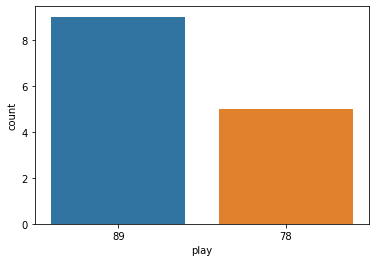

In [349]:
plt.tight_layout()
sns.countplot(x='play',data=df)
plt.xticks([1, 0], [78,89])
plt.show()

In [350]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
label =LabelEncoder()
df['play']=label.fit_transform(df.play)

In [351]:
df

outlook temperature humidity  windy  play
0   overcast         hot     high  FALSE     1
1   overcast        cool   normal   TRUE     1
2   overcast        mild     high   TRUE     1
3   overcast         hot   normal  FALSE     1
4      rainy        mild     high  FALSE     1
5      rainy        cool   normal  FALSE     1
6      rainy        cool   normal   TRUE     0
7      rainy        mild   normal  FALSE     1
8      rainy        mild     high   TRUE     0
9      sunny         hot     high  FALSE     0
10     sunny         hot     high   TRUE     0
11     sunny        mild     high  FALSE     0
12     sunny        cool   normal  FALSE     1
13     sunny        mild   normal   TRUE     1

In [352]:
ordinal =OrdinalEncoder(categories=[['normal','high']])
df['humidity']=ordinal.fit_transform(df[['humidity']])

In [353]:
nominal = OneHotEncoder()
df[list(df.outlook.unique())]=nominal.fit_transform(df[['outlook']]).A

In [355]:
df=pd.get_dummies(df,columns=['temperature','windy'],drop_first=True)

In [358]:
df=df.drop(['outlook'],axis=1)

humidity  play  overcast  rainy  sunny  temperature_hot  temperature_mild  \
0        1.0     1       1.0    0.0    0.0                1                 0   
1        0.0     1       1.0    0.0    0.0                0                 0   
2        1.0     1       1.0    0.0    0.0                0                 1   
3        0.0     1       1.0    0.0    0.0                1                 0   
4        1.0     1       0.0    1.0    0.0                0                 1   
5        0.0     1       0.0    1.0    0.0                0                 0   
6        0.0     0       0.0    1.0    0.0                0                 0   
7        0.0     1       0.0    1.0    0.0                0                 1   
8        1.0     0       0.0    1.0    0.0                0                 1   
9        1.0     0       0.0    0.0    1.0                1                 0   
10       1.0     0       0.0    0.0    1.0                1                 0   
11       1.0     0       0.0    0.0    1.0                0                 1   
12       0.0     1       0.0    0.0    1.0                0                 0   
13       0.0     1       0.0    0.0    1.0                0                 1   

    windy_TRUE  
0            0  
1            1  
2            1  
3            0  
4            0  
5            0  
6            1  
7            0  
8            1  
9            0  
10           1  
11           0  
12           0  
13           1

# train test

In [363]:
x= df.drop("play",axis=1)
y= df['play']
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size=0.8,random_state=45,stratify=y)

In [364]:
dt_tree =DecisionTreeClassifier()
dt_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [385]:
y_pred_train=dt_tree.predict(x_train)
classification_report_=classification_report(y_train,y_pred_train)
print(classification_report_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [386]:
y_pred_train=dt_tree.predict(x_test)
classification_report_=classification_report(y_test,y_pred_train)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [372]:
plt.figure(figsize=(500,250))
plot_tree(dt_tree,feature_names=x.columns,class_names=['0','1'],filled=True)
plt.show()

# hyperparameter tunning

In [387]:
dt_model =DecisionTreeClassifier()
para={'criterion':['gini','entropy'],
     'max_depth':np.arange(2,8),
     'min_samples_split':np.arange(3,20),
     'min_samples_leaf':np.arange(3,15)}
rand_srch =RandomizedSearchCV(dt_model,para,cv=4)
rand_srch.fit(x_train,y_train)


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [388]:
rand_srch.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=11, min_samples_split=3)

In [389]:
dt_=DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=13)
dt_.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=13)

In [390]:
y_pred_train=dt_.predict(x_train)
classification_report_=classification_report(y_train,y_pred_train)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      1.00      0.78         7

    accuracy                           0.64        11
   macro avg       0.32      0.50      0.39        11
weighted avg       0.40      0.64      0.49        11



In [391]:
y_pred_train=dt_.predict(x_test)
classification_report_=classification_report(y_test,y_pred_train)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



# Prunning

In [403]:
dt_tree_model = DecisionTreeClassifier(random_state=45,ccp_alpha=0.0)
dt_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=45)

In [404]:
y_pred_train=dt_tree_model.predict(x_train)
classification_report_=classification_report(y_train,y_pred_train)
print(classification_report_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [405]:
y_pred_train=dt_tree_model.predict(x_test)
classification_report_=classification_report(y_test,y_pred_train)
print(classification_report_)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



# post Pruning

In [407]:
dt_tree_result = dt_tree_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list =dt_tree_result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.06818182, 0.06818182, 0.09090909, 0.09917355])

In [408]:
train_list=[]
test_list=[]
for i in ccp_alpha_list:
    dt_clf_1=DecisionTreeClassifier(random_state=45,ccp_alpha=i)
    dt_clf_1.fit(x_train,y_train)
    
    train_list.append(dt_clf_1.score(x_train,y_train))
    test_list.append(dt_clf_1.score(x_test,y_test))

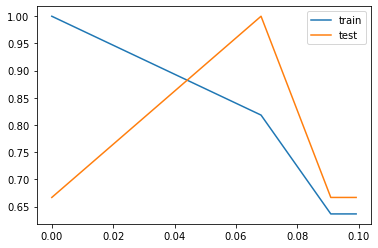

In [420]:
plt.plot(ccp_alpha_list,train_list,label='train')
plt.plot(ccp_alpha_list,test_list,label='test')
plt.legend()

In [410]:
test_list

[0.6666666666666666, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666]

In [411]:
np.where(test_list==np.max(test_list))

(array([1, 2], dtype=int64),)

In [412]:
train[1]

0.8009280643714729

In [413]:
test[1]

0.6658276588461036

In [ ]:
y_pred_train=dt_tree_model.predict(x_train)
classification_report_=classification_report(y_train,y_pred_train)
print(classification_report_)

In [ ]:
y_pred_train=dt_tree_model.predict(x_test)
classification_report_=classification_report(y_test,y_pred_train)
print(classification_report_)